<a href="https://colab.research.google.com/github/mkwak92/food_sales_predictions/blob/main/Food_Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1 Food Sales Predictions
- Matthew Kwak
- Load data and run through statistics


# Loading and Data Cleaning

In [2]:
import pandas as pd
filename = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQO5rfuUZxb3yX9WDo8IJmbw1KuuZtw2c8ucN882QrFcSInxePdBAtsmgh70gGNelsypXvQwFfXw1Dh/pub?gid=685888892&single=true&output=csv'
df = pd.read_csv(filename)
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


1) How many rows and columns?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
len(df)

8523

In [5]:
len(df.columns)

12

2) What are the datatypes of each variable?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


3) Are there duplicates? If so, drop any duplicates.

In [7]:
df.duplicated().sum()

0

4) Identify missing values.

In [8]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
df.groupby('Item_Type').max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  """Entry point for launching an IPython kernel.


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Type,,,,,,,,,,
Baking Goods,FDZ60,20.85,reg,0.311090,265.5568,OUT049,2009,Tier 3,Supermarket Type3,7931.6754
Breads,FDZ35,20.85,reg,0.281510,263.6594,OUT049,2009,Tier 3,Supermarket Type3,8958.3390
Breakfast,FDR37,21.10,reg,0.274592,234.9300,OUT049,2009,Tier 3,Supermarket Type3,8209.3140
Canned,FDZ49,21.35,reg,0.328391,266.8884,OUT049,2009,Tier 3,Supermarket Type3,10306.5840
Dairy,FDZ50,20.70,reg,0.304737,266.6884,OUT049,2009,Tier 3,Supermarket Type3,10256.6490
Frozen Foods,FDZ52,20.85,reg,0.294939,264.8910,OUT049,2009,Tier 3,Supermarket Type3,9678.0688
Fruits and Vegetables,FDZ56,21.35,reg,0.321115,264.2252,OUT049,2009,Tier 3,Supermarket Type3,12117.5600
Hard Drinks,DRQ35,19.70,low fat,0.298205,261.4278,OUT049,2009,Tier 3,Supermarket Type3,7843.1240
Health and Hygiene,NCZ53,21.25,low fat,0.255348,266.6884,OUT049,2009,Tier 3,Supermarket Type3,9779.9362


5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

- I chose to add 'Missing' to rows from Outlet_Size with NA since we cannot make an assumption on how big the size of the area. With the other columns, Outlet_Location_Type and Outlet_type did not help in determining if it is Small, Medium, or High.
- I chose to use the Mean for adding the Item_Weight for as this will grab the average. Although this is not the most accurate, I believe this will keep the data set the cleanest

In [10]:
df['Outlet_Size'].fillna('Missing', inplace = True)

In [11]:
mean_weight = df['Item_Weight'].mean()
mean_weight

12.857645184135976

In [12]:
df['Item_Weight'].fillna(mean_weight, inplace=True)

In [13]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Missing,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Missing,Tier 2,Supermarket Type1,4710.5350


In [14]:
df.groupby('Item_Type').mean()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Type,,,,,
Baking Goods,12.377448,0.069169,126.380766,1997.728395,1952.971207
Breads,11.629818,0.066255,140.952669,1997.657371,2204.132226
Breakfast,12.785278,0.085723,141.788151,1997.336364,2111.808651
Canned,12.399254,0.068129,139.763832,1998.152542,2225.194904
Dairy,13.329387,0.072427,148.499208,1997.681818,2232.542597
Frozen Foods,12.865543,0.065645,138.503366,1998.024533,2132.867744
Fruits and Vegetables,13.161297,0.068513,144.581235,1997.719968,2289.009592
Hard Drinks,11.611435,0.064943,137.077928,1998.177570,2139.221622
Health and Hygiene,13.093044,0.055216,130.818921,1997.734615,2010.000265


In [15]:
baking_goods = df['Item_Type'] == 'Baking Goods'
df[baking_goods]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
21,FDW12,12.857645,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,12.857645,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
48,FDL12,15.850000,Regular,0.121633,Baking Goods,60.6220,OUT046,1997,Small,Tier 1,Supermarket Type1,2576.6460
71,FDL12,15.850000,Regular,0.121532,Baking Goods,59.2220,OUT013,1987,High,Tier 3,Supermarket Type1,599.2200
...,...,...,...,...,...,...,...,...,...,...,...,...
8435,FDT48,12.857645,Low Fat,0.000000,Baking Goods,196.5084,OUT027,1985,Medium,Tier 3,Supermarket Type3,793.6336
8441,FDK60,16.500000,Regular,0.094010,Baking Goods,95.2068,OUT049,1999,Medium,Tier 1,Supermarket Type1,777.6544
8465,FDX11,16.000000,Regular,0.106969,Baking Goods,180.5634,OUT045,2002,Missing,Tier 2,Supermarket Type1,2726.4510
8515,FDH24,20.700000,Low Fat,0.021518,Baking Goods,157.5288,OUT018,2009,Medium,Tier 3,Supermarket Type2,1571.2880


6) Confirm that there are no missing values after addressing them.



In [16]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 

In [17]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [18]:
lf = df['Item_Fat_Content'] == 'low fat'
df.loc[lf]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
27,DRJ59,11.650000,low fat,0.019356,Hard Drinks,39.1164,OUT013,1987,High,Tier 3,Supermarket Type1,308.9312
74,NCZ18,7.825000,low fat,0.186357,Household,254.3698,OUT049,1999,Medium,Tier 1,Supermarket Type1,5580.7356
82,FDV45,16.750000,low fat,0.045231,Snack Foods,187.9556,OUT018,2009,Medium,Tier 3,Supermarket Type2,4693.8900
108,DRE60,12.857645,low fat,0.278974,Soft Drinks,225.3720,OUT019,1985,Small,Tier 1,Grocery Store,679.1160
111,FDS52,8.890000,low fat,0.005505,Frozen Foods,102.4016,OUT017,2007,Missing,Tier 2,Supermarket Type1,2732.4432
...,...,...,...,...,...,...,...,...,...,...,...,...
7925,FDM39,6.420000,low fat,0.053426,Dairy,178.7002,OUT013,1987,High,Tier 3,Supermarket Type1,4477.5050
8068,NCU53,5.485000,low fat,0.042744,Health and Hygiene,166.2842,OUT035,2004,Small,Tier 2,Supermarket Type1,1989.4104
8295,FDX58,13.150000,low fat,0.044011,Snack Foods,181.2950,OUT017,2007,Missing,Tier 2,Supermarket Type1,4028.0900
8380,FDI19,15.100000,low fat,0.000000,Meat,244.2512,OUT045,2002,Missing,Tier 2,Supermarket Type1,3635.2680


In [19]:
df.replace(['lf', 'low fat'], ['Low Fat', 'Low Fat'], inplace = True)

In [20]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'LF', 'reg'], dtype=object)

In [21]:
df.replace(['LF', 'reg'], ['Low Fat', 'Regular'], inplace = True)

In [22]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

8) For any numerical columns, obtain the summary statistics of each (min, max, mean)



In [23]:
df.describe().round(4)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.0000,8523.0000,8523.0000,8523.0000,8523.0000
mean,12.8576,0.0661,140.9928,1997.8319,2181.2889
std,4.2261,0.0516,62.2751,8.3718,1706.4996
min,4.5550,0.0000,31.2900,1985.0000,33.2900
25%,9.3100,0.0270,93.8265,1987.0000,834.2474
50%,12.8576,0.0539,143.0128,1999.0000,1794.3310
75%,16.0000,0.0946,185.6437,2004.0000,3101.2964
max,21.3500,0.3284,266.8884,2009.0000,13086.9648


# Exploratory Visulations
- Histogram to view the distributions of various features in your dataset.
- Boxplot to view statistical summaries of various features in your dataset.
- Heatmap of the correlation between features.

In [24]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

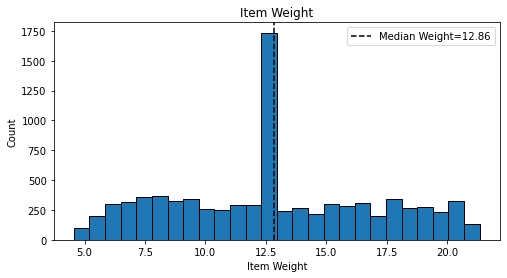

In [26]:
plt.figure(figsize = (8,4))
plt.hist(df['Item_Weight'], bins = 'auto', edgecolor = 'black')

plt.xlabel('Item Weight')
plt.ylabel('Count')
plt.title('Item Weight')
median = df['Item_Weight'].median().round(2)
plt.axvline(df['Item_Weight'].median(), color = 'black', linestyle= '--',
            label = f'Median Weight={median}')
plt.legend();

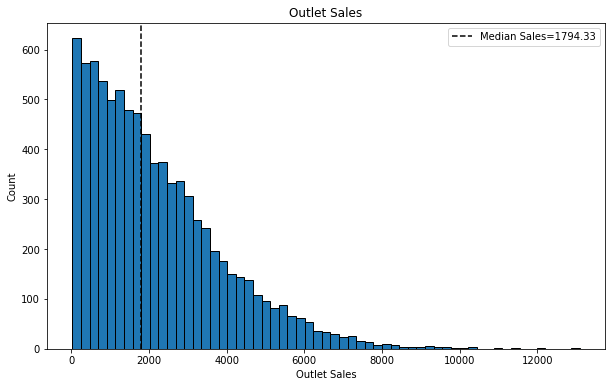

In [27]:
plt.figure(figsize = (10,6))
plt.hist(df['Item_Outlet_Sales'], bins = 'auto', edgecolor = 'black')

plt.xlabel('Outlet Sales')
plt.ylabel('Count')
plt.title('Outlet Sales')
median = df['Item_Outlet_Sales'].median().round(2)
plt.axvline(df['Item_Outlet_Sales'].median(), color = 'black', linestyle= '--',
            label = f'Median Sales={median}')
plt.legend();

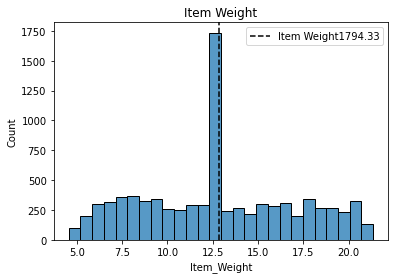

In [28]:
ax = sns.histplot(data = df, x = 'Item_Weight');

ax.set(title= 'Item Weight')
ax.axvline(df['Item_Weight'].median(),color = 'black', linestyle ='--', label=f'Item Weight{median}')
ax.legend();

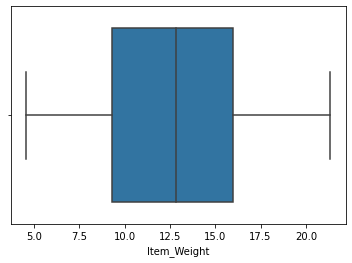

In [29]:
sns.boxplot(data = df, x = 'Item_Weight')

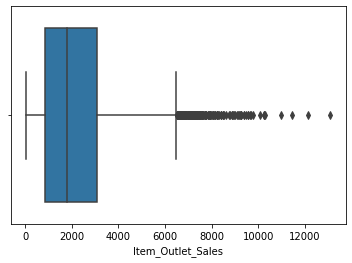

In [30]:
sns.boxplot(data = df, x = 'Item_Outlet_Sales')

In [31]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


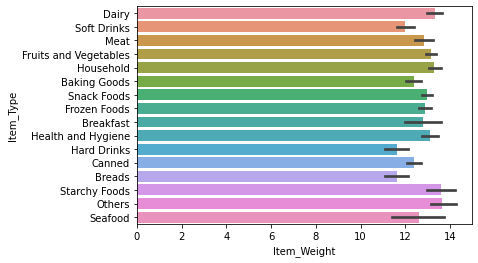

In [32]:
sns.barplot(data=df, y='Item_Type', x='Item_Weight');

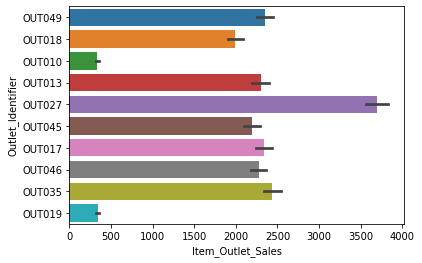

In [33]:
sns.barplot(data=df, y='Outlet_Identifier', x='Item_Outlet_Sales');

In [34]:
corr = df.corr()

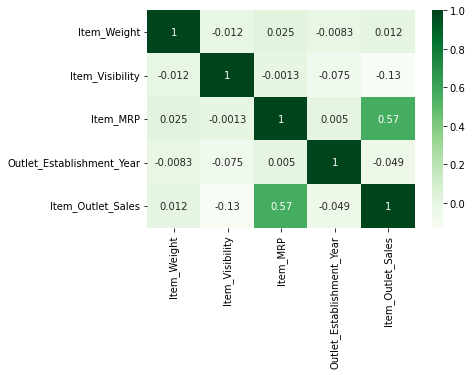

In [35]:
sns.heatmap(corr, cmap = 'Greens', annot = True)

In [36]:
Item_Type_Counts = df['Item_Type'].value_counts()

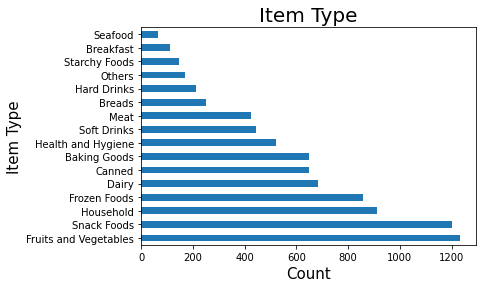

In [37]:
Item_Type_Counts.plot(kind = 'barh')
plt.title('Item Type', fontsize = 20)
plt.ylabel('Item Type', fontsize = 15)
plt.xlabel('Count', fontsize = 15)

#Show your figure
plt.show()

#Display the count chart below the plot

# Explantatory Analysis: Build on your previous cleaning, exploration, and analysis. 

- Create a minimum of two data visualizations that help others understand trends in the data (explanatory data analysis).
- Since these graphs are for reporting purposes, make sure they look nice by including titles, legends, etc.

In [38]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [44]:
fruits_veg = df['Item_Type'] == 'Fruits and Vegetables' #created a variable just to look at Fruits and Vegetables
df_fruits_veg = df[fruits_veg]
snack_food = df['Item_Type'] == 'Snack Foods'
df_snack = df[snack_food]

The graph below shows the linear regression between the Fruits and Vegatables list price (MRP) and how many sales they calculated. We can see that there is a positive correlation as the larger the list price, the more sales is brought in. 

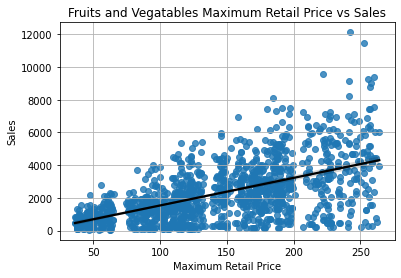

In [82]:
ax = sns.regplot(data=df_fruits_veg, x = 'Item_MRP', y = 'Item_Outlet_Sales', line_kws = {'color':'black', 'ls': '-'})
plt.title('Fruits and Vegatables Maximum Retail Price vs Sales')
plt.xlabel('Maximum Retail Price')
plt.ylabel('Sales')
plt.grid()

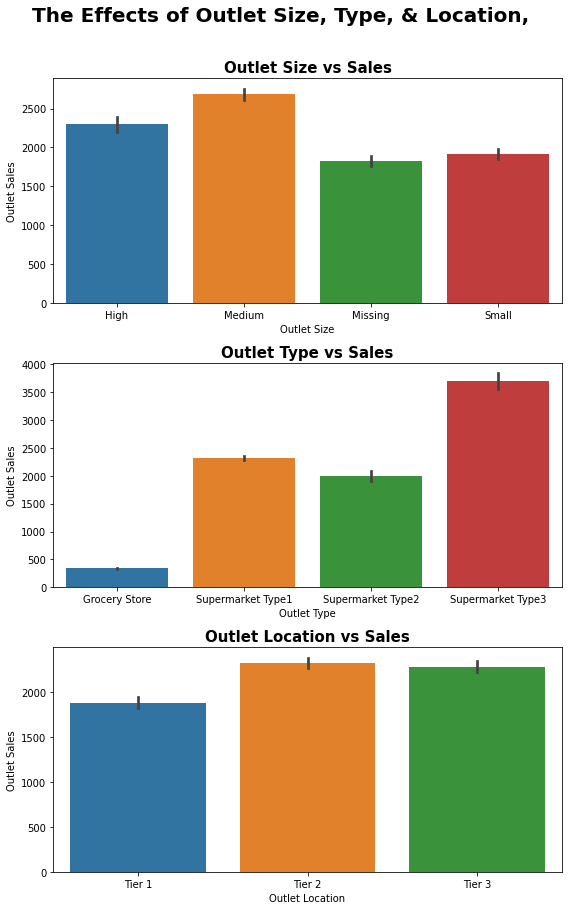

In [104]:
fig, axes = plt.subplots(nrows=3, figsize=(8,12))

sns.barplot(data=df, x = df['Outlet_Size'].sort_values(), y = 'Item_Outlet_Sales', ax=axes[0])
axes[0].set_title('Outlet Size vs Sales', fontsize = 15, fontweight = 'bold')
axes[0].set_xlabel('Outlet Size')
axes[0].set_ylabel('Outlet Sales')

sns.barplot(data=df, x = df['Outlet_Type'].sort_values(), y = 'Item_Outlet_Sales', ax=axes[1])
axes[1].set_title('Outlet Type vs Sales', fontsize = 15, fontweight = 'bold')
axes[1].set_xlabel('Outlet Type')
axes[1].set_ylabel('Outlet Sales')

sns.barplot(data=df, x = df['Outlet_Location_Type'].sort_values(), y = 'Item_Outlet_Sales', ax=axes[2])
axes[2].set_title('Outlet Location vs Sales', fontsize = 15, fontweight = 'bold')
axes[2].set_xlabel('Outlet Location')
axes[2].set_ylabel('Outlet Sales')


fig.suptitle('The Effects of Outlet Size, Type, & Location, ', fontsize = 20, fontweight = 'bold', y = 1.05)
fig.tight_layout()

The code above shows effects of Outlet Size, Outlet Type, and Outlet Location versus sales. 
- The Medium sized outlet scored the highest sales, but there does seem to be much difference the medium size and high size. It makes sense that the small size outlet had the least amount of sales. 
- The data dictionary did not provide any detail on what it means to be a different type of supermarket, but the Supermarket Type3 exceeded well more than any other type of grocery store or supermarket. 
- The Location vs Sales, there does not seem to be much difference in location and their respective sales. Again, the data dictionary does not provide what it means to be in each Tier. 